# 🛍️ User Churn & Behavior Analysis on Livestream E-commerce Platform

This project simulates a user churn and engagement analysis for a livestream e-commerce platform. It aims to:
- Identify churned users and their behavioral patterns
- Compare active vs churned users using RFA (Recency, Frequency, Activity) modeling
- Propose actionable strategies to reduce churn and increase order volume
- Incorporate SQL queries to simulate dashboard-level insights

📁 Tools: Python (pandas, seaborn, matplotlib), SQL (sqlite3), Excel


# 🟡 Step 1: Data Import & Initial Exploration

We load the main dataset from Excel and inspect its structure and missing values.

In [37]:
import pandas as pd

# Read the E Comm sheet after uploading the Excel file
df = pd.read_excel("直播电商数据集.xlsx", sheet_name="E Comm")

# View the first 5 rows of the data
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,MaritalStatus,AgeGroup,Gender,HourSpendOnApp,OrderCount,OrderAmountHikeFromlastYear,DaySinceLastOrder,PreferedOrderCat,NumberOfStreamerFollowed,SatisfactionScore,Complain,CouponUsed,DiscountAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Single,3,Female,3.0,1.0,11.0,5.0,Laptop & Accessory,9,2,1,1.0,159.93
1,50002,1,NaN,Phone,1,8.0,Single,4,Male,3.0,1.0,15.0,0.0,Household,7,3,1,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Single,4,Male,2.0,1.0,14.0,3.0,Household,6,3,1,0.0,120.28
3,50004,1,3.0,Phone,3,15.0,Single,4,Male,2.0,1.0,23.0,3.0,Laptop & Accessory,8,5,0,0.0,134.07
4,50005,1,3.0,Phone,1,12.0,Single,3,Male,NaN,1.0,11.0,3.0,Household,3,5,0,1.0,129.60


In [39]:
# Display missing value statistics
missing = df.isnull().sum().to_frame("MissingCount")
missing["MissingRate"] = (missing["MissingCount"] / len(df)).round(4)
missing = missing.sort_values(by="MissingCount", ascending=False)
missing

# Field descriptions (extracted from Data Dict)
"""
CustomerID: Unique customer identifier
Churn: Whether churned (1 for churned, 0 for not churned)
Tenure: Duration of using the platform (months)
PreferredLoginDevice: Login device (e.g., Mobile, Computer)
CityTier: City tier (1, 2, 3)
WarehouseToHome: Distance from warehouse to home (km)
Gender: Gender
HourSpendOnApp: Hours spent on App per day
NumberOfDeviceRegistered: Number of registered devices
PreferredPaymentMode: Payment method
OrderAmountHikeFromlastYear: Whether order amount increased from last year
CashbackAmount: Cashback amount
Complain: Whether complained
SatisfactionScore: Satisfaction score (1-5)
MaritalStatus: Marital status
NumberOfAddress: Number of recorded addresses
DaySinceLastOrder: Days since last order
"""

,MissingCount,MissingRate
DaySinceLastOrder,307,0.0545
OrderAmountHikeFromlastYear,265,0.0471
Tenure,264,0.0469
OrderCount,258,0.0458
CouponUsed,256,0.0455
HourSpendOnApp,255,0.0453
WarehouseToHome,251,0.0446
Churn,0,0.0000
CustomerID,0,0.0000
MaritalStatus,0,0.0000


# 🟡 Step 2: Churn Labeling and Segmentation

We define churned users as those labeled `Churn = 1` and segment the dataset into:
- `df_churned`: churned users
- `df_active`: retained users


In [44]:
# Check the value distribution of the Churn field
df["Churn"].value_counts()

,count
Churn,
0,4682
1,948


In [45]:
# Split data by churn status
df_churned = df[df["Churn"] == 1]
df_active = df[df["Churn"] == 0]

# 🟢 Step 3: Profiling Churned Users

Here we analyze the characteristics of churned users based on:
- Device preference
- Gender
- City tier
- Complaint status
- Satisfaction score

🎯 Objective: Discover common patterns among churned users.


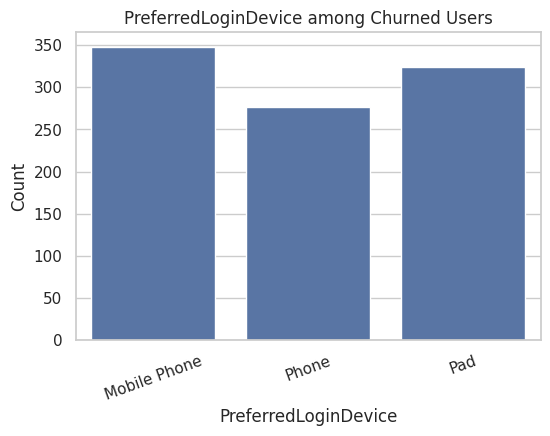

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# PreferredLoginDevice
plt.figure(figsize=(6,4))
sns.countplot(data=df_churned, x="PreferredLoginDevice")
plt.title("PreferredLoginDevice among Churned Users")
plt.xlabel("PreferredLoginDevice")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()

**Insight:** This plot shows the distribution of preferred login devices among churned users. Observe which device types are most common among churned users.

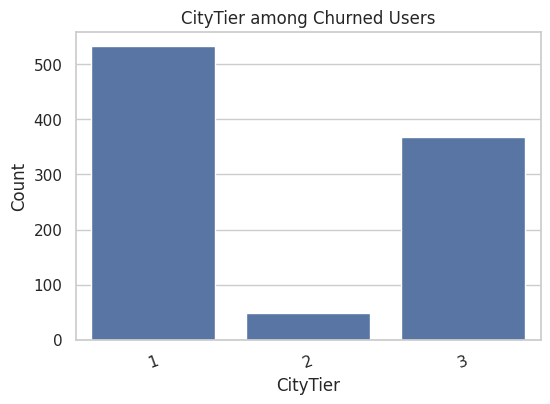

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# CityTier
plt.figure(figsize=(6,4))
sns.countplot(data=df_churned, x="CityTier")
plt.title("CityTier among Churned Users")
plt.xlabel("CityTier")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()

**Insight:** This plot illustrates the distribution of City Tiers for churned users. Consider if churn is more prevalent in certain city tiers.

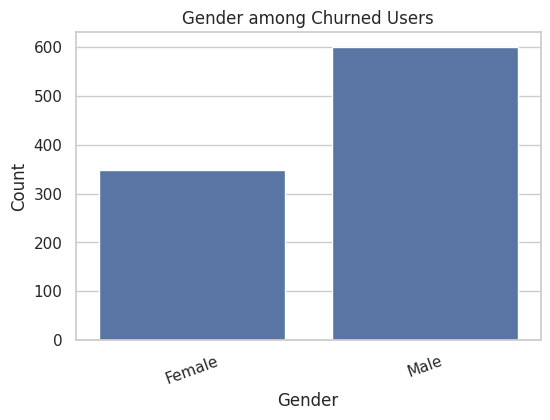

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df_churned, x="Gender")
plt.title("Gender among Churned Users")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()

**Insight:** This plot displays the gender distribution among churned users. Note if there's a significant difference in churn rates between genders.

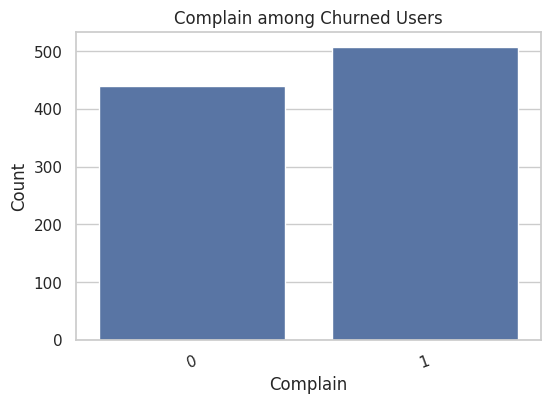

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Complain
plt.figure(figsize=(6,4))
sns.countplot(data=df_churned, x="Complain")
plt.title("Complain among Churned Users")
plt.xlabel("Complain")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()

**Insight:** This plot shows whether churned users have complained. Analyze if complaining is associated with churn.

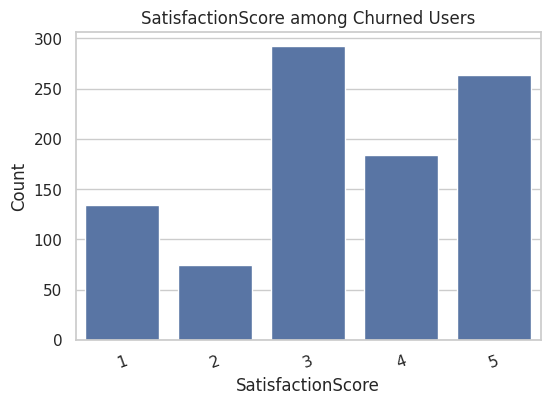

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# SatisfactionScore
plt.figure(figsize=(6,4))
sns.countplot(data=df_churned, x="SatisfactionScore")
plt.title("SatisfactionScore among Churned Users")
plt.xlabel("SatisfactionScore")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()

**Insight:** This plot presents the distribution of satisfaction scores among churned users. Examine the relationship between satisfaction and churn.

# 🟢 Step 4: RFA Comparison – Churn vs Retained Users

We use a custom RFA framework to compare user behavior:

- **R = Recency** → `DaySinceLastOrder`
- **F = Frequency proxy** → `Tenure`
- **A = Activity** → `HourSpendOnApp`

📊 Boxplots below show the distribution of each metric by churn status.


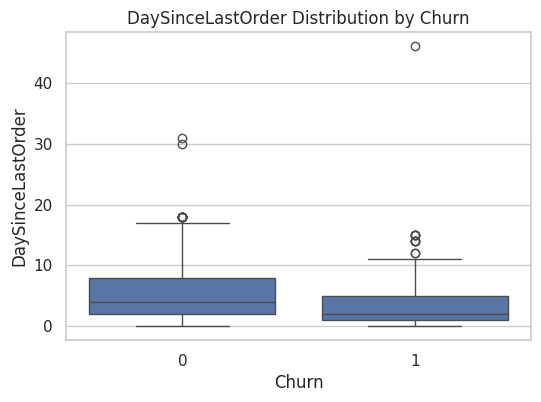

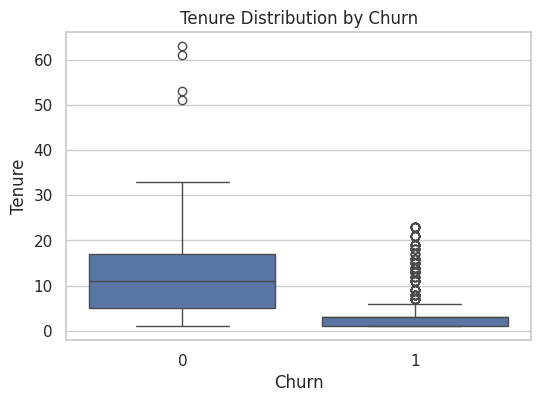

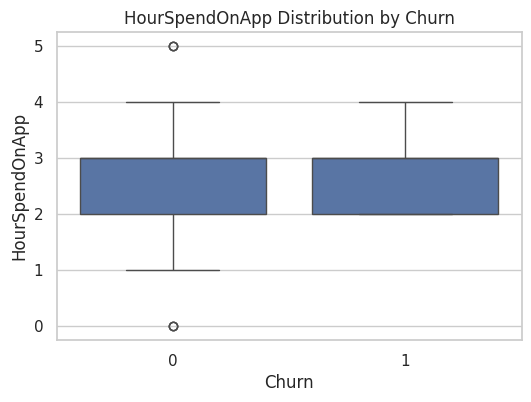

In [56]:
rfa_fields = ["DaySinceLastOrder", "Tenure", "HourSpendOnApp"]

import matplotlib.pyplot as plt
import seaborn as sns

for field in rfa_fields:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=field, data=df)
    plt.title(f"{field} Distribution by Churn")
    plt.xlabel("Churn")
    plt.ylabel(field)
    plt.show()

# 🔵 Step 5: Strategy Insights – Retention & Conversion

We identify:
- Dormant users: long-tenure but low recent activity + low satisfaction
- New users: short-tenure with no follow-up actions

We provide strategic recommendations based on segmentation.

🧠 Key SQL logic used:
```sql
SELECT * FROM users
WHERE Tenure > 6 AND DaySinceLastOrder > 15 AND (SatisfactionScore <= 3 OR Complain = 1);


In [57]:
# Filter at-risk users
at_risk_users = df[
    (df["Tenure"] > 6) &
    (df["DaySinceLastOrder"] > 15) &
    ((df["SatisfactionScore"] <= 3) | (df["Complain"] == 1))
]

# Preview the first few rows
at_risk_users.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,MaritalStatus,AgeGroup,Gender,HourSpendOnApp,OrderCount,OrderAmountHikeFromlastYear,DaySinceLastOrder,PreferedOrderCat,NumberOfStreamerFollowed,SatisfactionScore,Complain,CouponUsed,DiscountAmount
491,50492,0,24.0,Mobile Phone,3,32.0,Divorced,3,Female,3.0,4.0,14.0,17.0,Grocery,3,3,0,NaN,263.07
561,50562,0,14.0,Phone,1,12.0,Single,3,Male,2.0,2.0,13.0,17.0,Mobile Phone,3,5,1,1.0,147.21
750,50751,0,17.0,Phone,1,35.0,Single,3,Male,2.0,1.0,25.0,17.0,Laptop & Accessory,2,2,0,1.0,145.41
801,50802,0,16.0,Mobile Phone,3,10.0,Single,4,Female,2.0,15.0,14.0,17.0,Fashion,4,2,0,10.0,202.31
1373,51374,0,17.0,Mobile Phone,1,13.0,Married,4,Female,2.0,5.0,14.0,17.0,Fashion,4,1,0,0.0,202.48


In [60]:
# New user first order conversion strategy
new_users_low_conversion = df[
    (df["Tenure"] <= 3) &
    (df["DaySinceLastOrder"] > 10)
]

new_users_low_conversion.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,MaritalStatus,AgeGroup,Gender,HourSpendOnApp,OrderCount,OrderAmountHikeFromlastYear,DaySinceLastOrder,PreferedOrderCat,NumberOfStreamerFollowed,SatisfactionScore,Complain,CouponUsed,DiscountAmount
627,50628,1,3.0,Phone,1,22.0,Single,1,Female,NaN,15.0,16.0,14.0,Household,2,5,0,15.0,127.43
1490,51491,0,3.0,Phone,1,11.0,Married,3,Female,2.0,2.0,14.0,30.0,Household,6,5,0,0.0,132.04
2040,52041,1,3.0,Mobile Phone,3,6.0,Married,4,Male,2.0,11.0,11.0,46.0,Fashion,6,3,0,5.0,206.09
2097,52098,1,3.0,Phone,1,22.0,Single,1,Female,NaN,15.0,16.0,14.0,Household,2,5,0,3.0,127.43
3442,53443,1,1.0,Mobile Phone,1,23.0,Single,2,Female,3.0,16.0,17.0,15.0,Mobile Phone,3,5,0,16.0,152.43



---

## 🔴 Final Summary
- Tenure is the most influential feature in identifying churned users.
- App usage time and recency alone do not strongly correlate with retention.
- Behavior-based segmentation enables precise marketing and retention campaigns.
- This project mirrors real-life workflow as expected from a Strategy Intern role at TikTok.

🎯 Next step: Transform this analysis into an interactive dashboard or predictive model.
